In [1]:
# Sashank Singh 


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('IMDBData.csv')

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
!pip install pandas nltk scikit-learn joblib matplotlib wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Keep only letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into one string
    return ' '.join(words)

# Apply preprocessing to the 'review' column
df['cleaned_review'] = df['review'].apply(preprocess)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/2825996/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/2825996/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
print(df['cleaned_review'])

0        one reviewer mentioned watching oz episode hoo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: cleaned_review, Length: 50000, dtype: object


In [8]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['cleaned_review']
y = df['sentiment']

# Encode labels ('positive' as 1 and 'negative' as 0)
y = y.map({'positive': 1, 'negative': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Accuracy: 0.8893
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [12]:
new_reviews = [
    "I absolutely loved this movie! The plot was exciting, and the acting was phenomenal.",
    "This movie was incredibly boring. I had to stop watching halfway through.",
    "What a fantastic movie! The visual effects were breathtaking, and the storyline kept me hooked.",
    "The script was weak, and the plot twists were poorly executed.",
    " Lucifer worst series on Netflix "
]


In [13]:
def predict_sentiment(review):
    # Preprocess the review
    cleaned_review = preprocess(review)
    # Transform the review using the saved TF-IDF vectorizer
    review_tfidf = tfidf_vectorizer.transform([cleaned_review])
    # Predict sentiment using the saved model
    prediction = model.predict(review_tfidf)
    # Map prediction 
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    return sentiment

In [14]:
# Predict sentiment for each review
for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: I absolutely loved this movie! The plot was exciting, and the acting was phenomenal.
Predicted Sentiment: Positive

Review: This movie was incredibly boring. I had to stop watching halfway through.
Predicted Sentiment: Negative

Review: What a fantastic movie! The visual effects were breathtaking, and the storyline kept me hooked.
Predicted Sentiment: Positive

Review: The script was weak, and the plot twists were poorly executed.
Predicted Sentiment: Negative

Review:  Lucifer worst series on Netflix 
Predicted Sentiment: Negative



In [15]:
df.describe()

,review,sentiment,cleaned_review
count,50000,50000,50000
unique,49582,2,49574
top,Loved today's show!!! It was a variety and not...,positive,loved today show variety solely cooking would ...
freq,5,25000,5


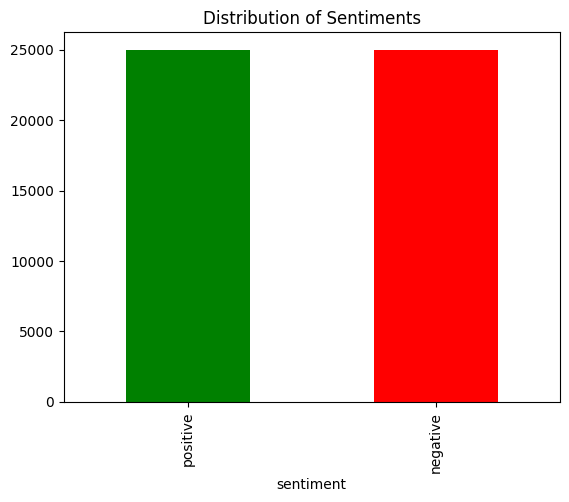

In [16]:
import matplotlib.pyplot as plt

# Plotting sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of Sentiments")
plt.show()  # This will now work in Jupyter Notebook


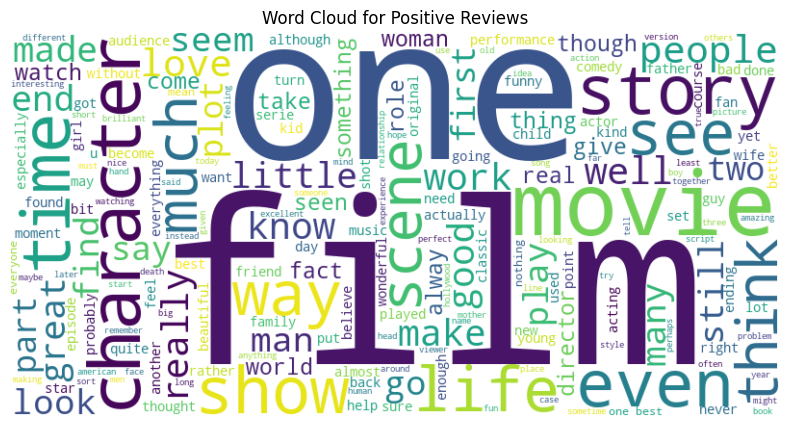

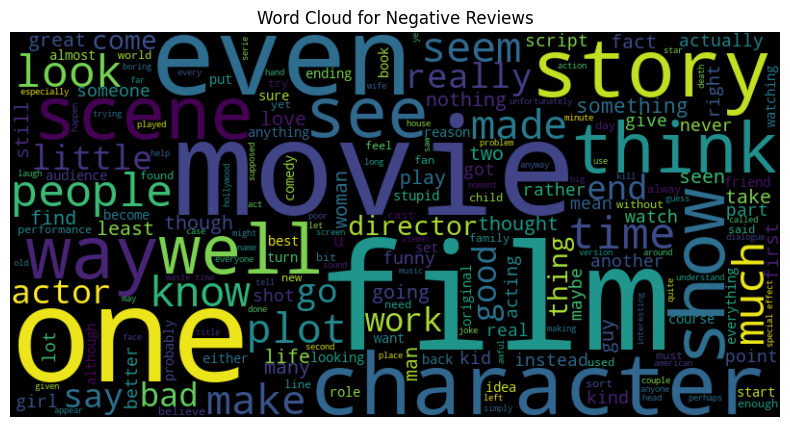

In [17]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review'].str.cat(sep=' ')

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()


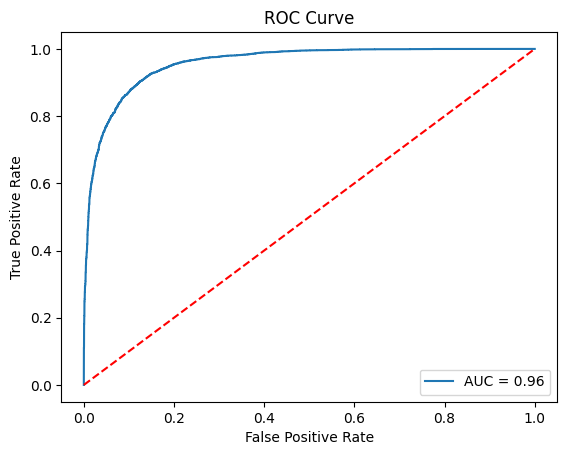

In [18]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


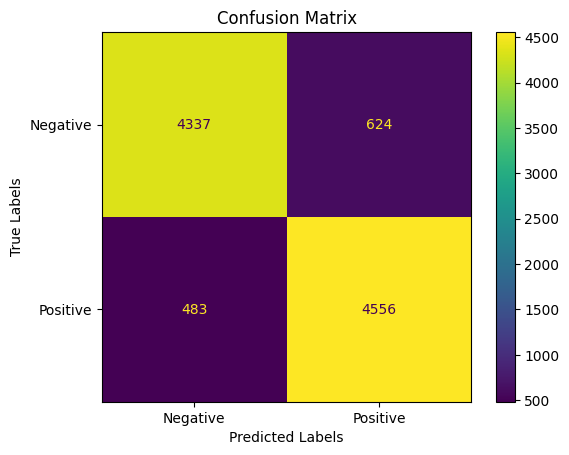

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, display_labels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
